### Section 3. Number addition

### **Description**

Implementing a function that can add two integer numbers.

**Input**
Two interger A and B that has precisely 4 digits.

**Output**
Sum of the two number.

### **Implementation**

In [ ]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt

**Approach explanation**

**1. Modeling**

Firstly, the assignment requires us to implement a function basing on the Machine Learning aspects. Thus, before making a function to return the output of addition, we need to build a model that can learn the pattern of the two input so it can predict the summation result.

**Library use**: Tensorflow, Keras

**Model structure**: Input layer -> n x Hidden Layer -> Output layer




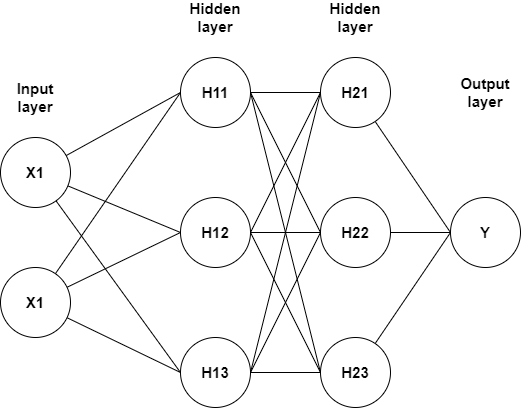

The figure above is an general view of the model that I manage to build.

Here in the model, the hidden will be established via the function **Dense** of the Keras library.

**2. Dense layer**

Dense layer is a element in Machine Learning generally and in Keras library specifically. It is a layer that receives the input as the values come from the previous layer, performs mathematical mechanism within the forward propagation, update the value within the backward probagation, and generate the output with the new dimension (which is assigned by us).

**Parameters** (mainly used):
* input: represent the output size of layer
* activation: the activation function used in the layer

**Output**: Y = H($\theta$)
in which $\theta = W.X + b$

* X: the input of previous layer (or the initial input data)
* W: weight value
* b: bias value


**3. Activation function**

The activation function is a function that receive the input with weight value (and bias) and transform it into the output. Each type of activation function performs differently depends on the scenario.

From the past lessons I have learned, especially in the classification problem, sigmoid and tanh are the most used functions to classify image, classes and vice versa.

The sigmoid function has the characteristics similar to Logistic Regression, in which the input will be transform into a output between 0 and 1. Meanwhile, the tanh function will transform the input into a value between -1 and 1. Both of them are nonlinear activation function, and are very useful for such problem like binary classification.

However, the mechanism is not so useful for continuos output in this assignment. The sigmoid function will always assign the output as 1 if the value is larger than 0.5, or as 0 if the value is smaller than 0.5. Tanh function also performs the same to sigmoid, in which value will changes around the value 0. If the input is smaller than 0, the output will become -1 and if the input is larger than 0, the output will be come 1.

We can conclude that using these functions may gradually decrease our accuracy when making summation of two integer numbers. Therefore, another activation function that I have used once in the past (but at that time I did not understand so well) - Rectified Linear Unit (ReLU) - will performs very well in this problem.

ReLu function will return the same input if the input > 0, or else it will return 0. This will make the weighted value not so likely to snapped into value 0 and 1 like the binary classification problem, thus increase the accuracy in learning pattern.

The image below (drawn on Desmos) represents for ReLU function
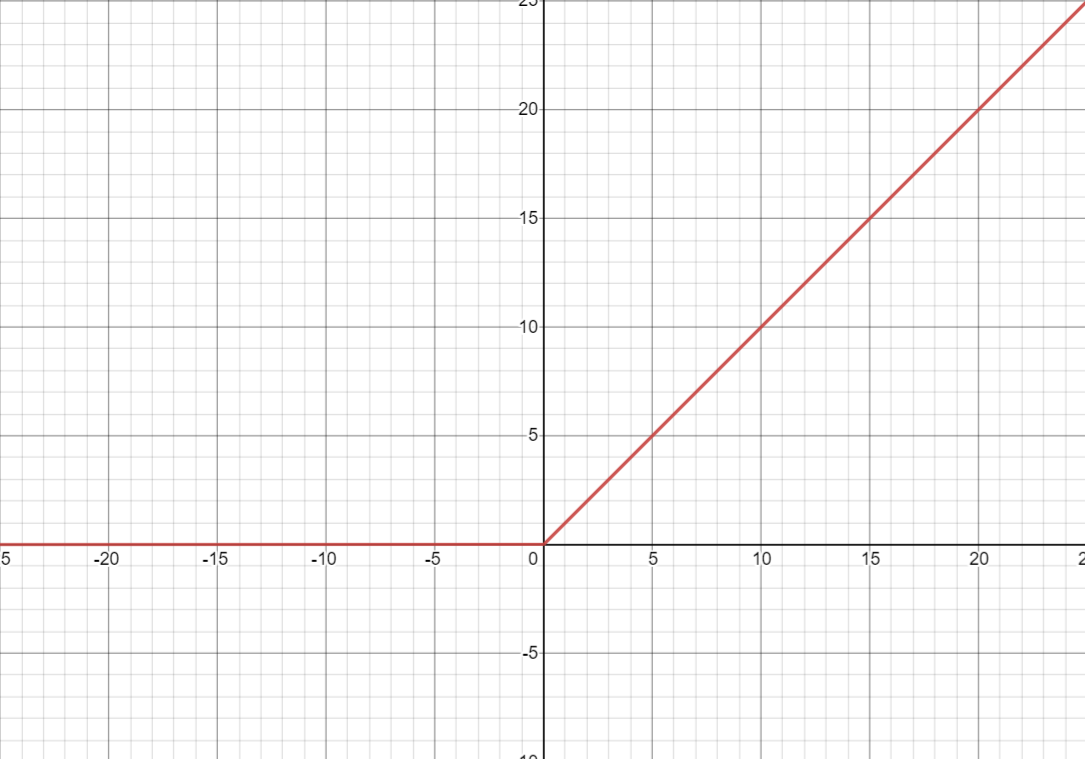

**Code implementation**

**1. Dataset generation**

In [ ]:
# Training dataset that will range from 1 to 10000
train_x = np.array([[1000, 1000]])
train_y = np.array([2000]) 
# Testing dataset that will range from 1000 to 10000 (aka unseen data)
test_x = np.array([[1002, 1002]])
test_y = np.array([2004])

for i in range(3, 10**4, 1): # Iterate to 10000 with step of 2 i.e: 3, 5, 7. . .
  train_x = np.append(train_x, [[i,i]], axis=0) # We create simple input that the number will add itself
  train_y = np.append(train_y, [i*2]) # Output: i + i = i*2

for i in range(1004, 8*(10**3), 2): # Iterate to 8000 with step of 2 i.e: 1002, 1004, 1006, ...
  test_x = np.append(test_x, [[i,i]], axis=0)
  test_y = np.append(test_y, [i*2])

print("Train dataset: {} ---- Train target: {}".format(train_x.shape, train_y.shape))
print("Test dataset: {} ---- Test target: {}".format(test_x.shape, test_y.shape))

Train dataset: (9998, 2) ---- Train target: (9998,)
Test dataset: (3499, 2) ---- Test target: (3499,)


In [ ]:
print("Train X: {}".format(train_x[10]))
print("Train Y: {}".format(train_y[10]))

print("Test X: {}".format(test_x[10]))
print("Test Y: {}".format(test_y[10]))

Train X: [12 12]
Train Y: 24
Test X: [1022 1022]
Test Y: 2044


**2. Model implementation**

In [ ]:
def model_builder():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(2,))) # Two integer numbers
    model.add(layers.Dense(1024, activation='relu')) # Unit = 1024, Activation = ReLU 
    model.add(layers.Dense(1024, activation='relu')) # Unit = 1024, Activation = ReLU
    model.add(layers.Dense(1024, activation='relu')) # Unit = 1024, Activation = ReLU 
    model.add(layers.Dense(1))

    model.compile(optimizer='adam', # Stochastic gradient descent method 
                  loss='mse', # Mean squared error
                  metrics=['mae']) # Mean absolute error
    
    model.summary()

    return model

In [ ]:
# Print the structure of model
add_model = model_builder()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 2)                 0         
_________________________________________________________________
dense_45 (Dense)             (None, 1024)              3072      
_________________________________________________________________
dense_46 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_47 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 1025      
Total params: 2,103,297
Trainable params: 2,103,297
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history_model = add_model.fit(train_x, train_y, epochs=8, validation_data=(test_x, test_y))

Epoch 1/8
313/313 [==============================] - 11s 35ms/step - loss: 6526699.4626 - mae: 971.6895 - val_loss: 0.0011 - val_mae: 0.0269
Epoch 2/8
313/313 [==============================] - 11s 34ms/step - loss: 0.0015 - mae: 0.0323 - val_loss: 9.2955e-04 - val_mae: 0.0252
Epoch 3/8
313/313 [==============================] - 11s 34ms/step - loss: 0.0015 - mae: 0.0321 - val_loss: 0.0012 - val_mae: 0.0287
Epoch 4/8
313/313 [==============================] - 11s 34ms/step - loss: 0.0015 - mae: 0.0322 - val_loss: 0.0014 - val_mae: 0.0329
Epoch 5/8
313/313 [==============================] - 11s 34ms/step - loss: 0.0016 - mae: 0.0336 - val_loss: 0.0012 - val_mae: 0.0299
Epoch 6/8
313/313 [==============================] - 11s 34ms/step - loss: 0.0018 - mae: 0.0363 - val_loss: 0.0010 - val_mae: 0.0265
Epoch 7/8
313/313 [==============================] - 10s 33ms/step - loss: 0.0017 - mae: 0.0337 - val_loss: 7.4037e-04 - val_mae: 0.0230
Epoch 8/8
313/313 [==============================] - 

**3. Plotting mean absolute error**

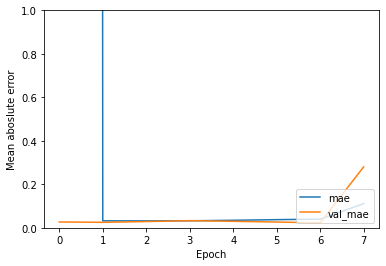

In [ ]:
plt.plot(history_model.history['mae'], label='mae')
plt.plot(history_model.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean aboslute error')
plt.ylim([0, 1])
plt.legend(loc='lower right')

After the first epoch, the error dramatically decrease to values that below 1 which is a very good sign.

**4. Model error and predict value**

In [ ]:
test_loss, test_acc = add_model.evaluate(test_x, test_y, verbose=2)

print('\nTest loss:', test_loss)

110/110 - 1s - loss: 0.0879 - mae: 0.2801

Test loss: 0.08785458654165268


In [ ]:
def add(X1, X2):

  X = np.array([[X1,X2]])
  result = add_model.predict(X)

  return result

In [ ]:
# Use random couple of integer number
x = np.array([[1234, 2643], [3000, 2000], [9121, 1942], [9999, 9999], [1926, 1962]])
for i in range(len(x)):
  output = add(x[i][0],x[i][1])
  print("Test case {}: {}".format(i+1 , float(output)))

Test case 1: 4050.93408203125
Test case 2: 5025.09619140625
Test case 3: 11910.4873046875
Test case 4: 19998.546875
Test case 5: 3889.38818359375


Examining the results above, we can conclude that the closer two inputs to each other, the more accuracy in the output. It may due to the pattern of our initial dataset, in which the inputs are completely the same values, and the outputs are actually the inputs multiply for 2.

**Conclusion**

This test is very interesting since it makes me to learn again the lesson of Neural Network, usage of TensorFlow, the activation function. I have tried to learn Machine Learning quite long ago. But at that time, I was really not so focus on them and just learn for fun/make show. Doing this assignment enables me to engage more with Machine Learning and to read more document for a comprehensive view in implementation. The work above is not really good to be considered as an accurate predictor, and it still have some spaces for improvement in the future.